In [1]:
### Importing Libraries

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from optbinning import OptimalBinning
import matplotlib.pyplot as plt




(CVXPY) Jan 27 06:35:42 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jan 27 06:35:42 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


In [2]:
### Step 1: Create Data for Binary Classification
# Generating random data for binary classification
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, 
                           n_redundant=2, random_state=42, class_sep=1.5)

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a DataFrame for easier analysis
columns = [f"Feature_{i+1}" for i in range(X.shape[1])]
data_train = pd.DataFrame(X_train, columns=columns)
data_train['Target'] = y_train
data_test = pd.DataFrame(X_test, columns=columns)
data_test['Target'] = y_test

print("Sample of Training Data:")
print(data_train.head())


Sample of Training Data:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.321708   0.183214  -0.387249   4.134154  -2.918721   2.594758   
1  -3.172932  -2.773759  -0.150937  -2.909223   0.834276   1.202147   
2   2.927181   1.172548  -1.475411   0.931541  -1.742672  -0.560265   
3  -2.857214  -1.845628   0.633169  -2.690834  -0.594000  -1.065098   
4   0.441282  -0.311210  -0.402383   0.340710  -1.841791   2.930308   

   Feature_7  Feature_8  Feature_9  Feature_10  Target  
0   2.700883   0.266700   0.758944   -5.832398       1  
1  -2.241517   0.036500  -0.422072    3.027971       0  
2  -0.090463  -0.377118  -0.510442   -0.672190       1  
3  -4.575776   0.215600   0.083699    2.703421       0  
4   0.583658  -2.228788   1.093123   -1.825679       1  


In [3]:
### Step 2: Optimal Binning
# Performing optimal binning on one feature for demonstration
feature_to_bin = "Feature_1"
opt_bin = OptimalBinning(name=feature_to_bin, dtype="numerical", solver="mip")
opt_bin.fit(X_train[:, 0], y_train)

# Optimal binning summary
binning_summary = opt_bin.binning_table.build()
print("Optimal Binning Summary:")
print(binning_summary)

Optimal Binning Summary:
                   Bin  Count  Count (%)  Non-event  Event  Event rate  \
0        (-inf, -1.75)     83   0.118571         82      1    0.012048   
1       [-1.75, -0.69)     68   0.097143         47     21    0.308824   
2       [-0.69, -0.28)     40   0.057143         23     17    0.425000   
3        [-0.28, 1.55)    250   0.357143        105    145    0.580000   
4         [1.55, 2.30)    129   0.184286         48     81    0.627907   
5         [2.30, 3.32)     87   0.124286         27     60    0.689655   
6          [3.32, inf)     43   0.061429          7     36    0.837209   
7              Special      0   0.000000          0      0    0.000000   
8              Missing      0   0.000000          0      0    0.000000   
Totals                    700   1.000000        339    361    0.515714   

             WoE        IV        JS  
0       4.469597  1.068760  0.077208  
1       0.868503  0.069890  0.008472  
2       0.365159  0.007579  0.000942  
3   

C:\Users\sthaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\sthaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\sthaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\sthaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Pyt

In [4]:
### Step 3: Logistic Regression
# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
train_probs = model.predict_proba(X_train)[:, 1]
test_probs = model.predict_proba(X_test)[:, 1]


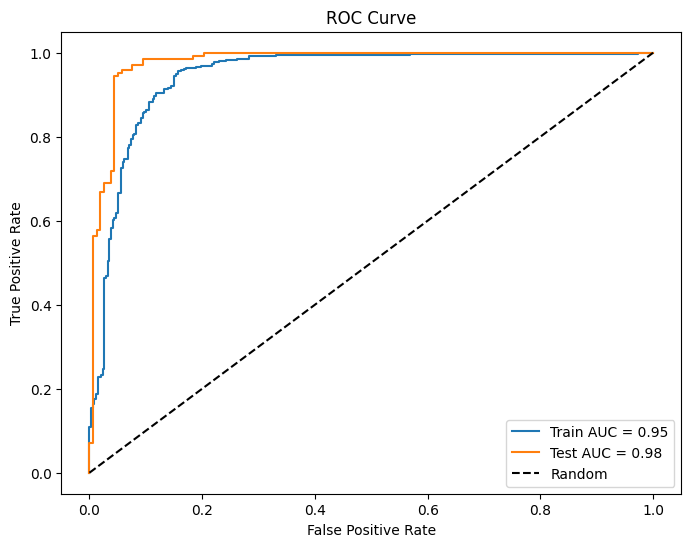

In [5]:
### Step 4: Calculate ROC for Train and Test Set
# Calculate ROC
fpr_train, tpr_train, _ = roc_curve(y_train, train_probs)
fpr_test, tpr_test, _ = roc_curve(y_test, test_probs)

# Calculate AUC
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.2f}")
plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


WOE Table:
              Bin  Count  Count (%)  Event  Non-event       WoE
0   (-inf, -1.75)     83   0.118571      1         82  4.469597
1  [-1.75, -0.69)     68   0.097143     21         47  0.868503
2  [-0.69, -0.28)     40   0.057143     17         23  0.365159
3   [-0.28, 1.55)    250   0.357143    145        105 -0.259896
4    [1.55, 2.30)    129   0.184286     81         48 -0.460370
5    [2.30, 3.32)     87   0.124286     60         27 -0.735630
6     [3.32, inf)     43   0.061429     36          7 -1.574731
7         Special      0   0.000000      0          0  0.000000
8         Missing      0   0.000000      0          0  0.000000


C:\Users\sthaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\sthaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\sthaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\sthaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Pyt

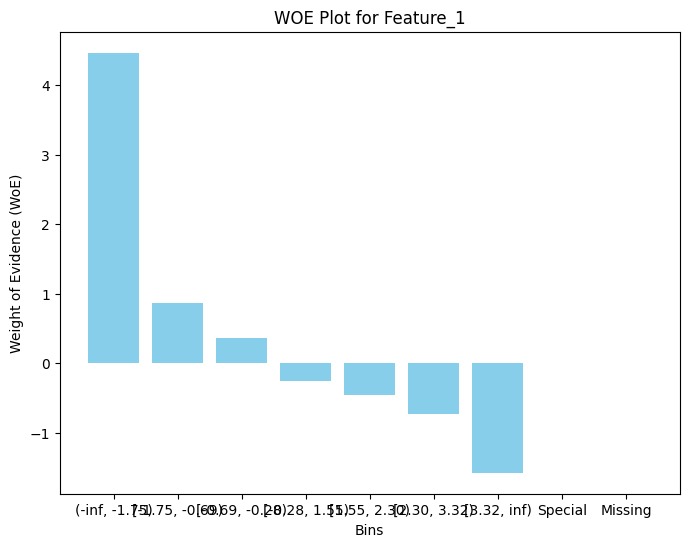

In [6]:
### Step 5: Weight of Evidence (WOE) and Binning Visualization
# Generate WOE Table
binning_table = opt_bin.binning_table.build()
woe_table = binning_table[['Bin', 'Count', 'Count (%)', 'Event', 'Non-event', 'WoE']]

# Ensure 'Bin' and 'WoE' columns are of the correct type
woe_table['Bin'] = woe_table['Bin'].astype(str)  # Convert Bin to string for labels
woe_table['WoE'] = pd.to_numeric(woe_table['WoE'], errors='coerce')  # Ensure WoE is numeric

# Drop any rows where WoE could not be converted to numeric
woe_table = woe_table.dropna(subset=['WoE'])

print("WOE Table:")
print(woe_table)

# Plot WOE
plt.figure(figsize=(8, 6))
plt.bar(woe_table['Bin'].astype(str), woe_table['WoE'], color='skyblue')
plt.xlabel("Bins")
plt.ylabel("Weight of Evidence (WoE)")
plt.title(f"WOE Plot for {feature_to_bin}")
plt.show()


# Extra 

In [11]:
import numpy as np
import pandas as pd
from optbinning import OptimalBinning

# Example Data
np.random.seed(42)
data = pd.DataFrame({
    "Age": np.random.randint(20, 60, 100),
    "Default": np.random.choice([0, 1], 100, p=[0.7, 0.3])
})
data


,Age,Default
0,58,0
1,48,0
2,34,0
3,27,1
4,40,0
...,...,...
95,28,1
96,27,0
97,31,0
98,53,0


In [12]:
# Fit Optimal Binning
opt_bin = OptimalBinning(name="Age", dtype="numerical", solver="mip")
opt_bin.fit(data["Age"], data["Default"])
binning_table = opt_bin.binning_table.build()
binning_table

C:\Users\sthaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\sthaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\sthaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\sthaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Pyt

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 42.50)",58,0.58,40,18,0.310345,-0.196115,0.023283,0.002906
1,"[42.50, 52.50)",25,0.25,20,5,0.200000,0.391672,0.034776,0.004319
2,"[52.50, 57.50)",10,0.10,9,1,0.100000,1.202602,0.103725,0.012237
3,"[57.50, inf)",7,0.07,4,3,0.428571,-0.706941,0.039812,0.004875
4,Special,0,0.00,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.00,0,0,0.000000,0.0,0.000000,0.000000
Totals,,100,1.00,73,27,0.270000,,0.201596,0.024337
